In [2]:
import numpy as np
from matplotlib import colors
from Configuration import *
import os

In [3]:
from climada.entity import Entity
from climada.entity import Exposures
from pandas import DataFrame
from climada.entity.exposures import LitPop

['British Columbia', 'Alberta', 'Saskatchewan', 'Manitoba', 'Ontario', 'Québec', 'New Brunswick', 'Yukon', 'Nunavut', 'Newfoundland and Labrador', 'Nova Scotia', 'Northwest Territories', 'Prince Edward Island']
Nova Scotia index: 10

 Runtime `from_shape` : 11.61 sec.



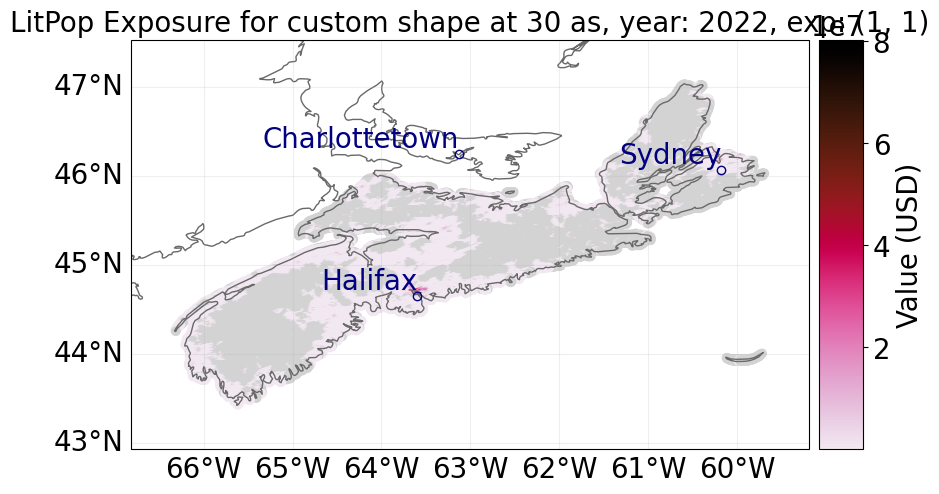

In [4]:
#Construct Exposure
#Buildings

import time
import climada.util.coordinates as u_coord
import climada.entity.exposures.litpop as lp

country_iso3a = 'CAN'
state_name = 'Nova Scotia'
reslution_arcsec = 200
"""First, we need to get the shape of Nova Scotia:"""
admin1_info, admin1_shapes = u_coord.get_admin1_info(country_iso3a)
admin1_info = admin1_info[country_iso3a]
admin1_shapes = admin1_shapes[country_iso3a]
admin1_names = [record['name'] for record in admin1_info]
print(admin1_names)
for idx, name in enumerate(admin1_names):
    if admin1_names[idx]==state_name:
        break
print('Nova Scotia index: ' + str(idx))

"""Secondly, we estimate the `total_value`"""
# `total_value` required user input for `from_shape`, here we compute 2.01% of total value of the whole CAN, and 12,97% of total GDP:
total_value = 0.0201 * 0.1297 * lp._get_total_value_per_country(country_iso3a, 'gdp', 2022)

"""Then, we can initiate the exposures for Nova Scotia:"""
start = time.process_time()
exp_building = LitPop.from_shape(admin1_shapes[idx], total_value, res_arcsec=30, reference_year=2022)
print(f'\n Runtime `from_shape` : {time.process_time() - start:1.2f} sec.\n')
exp_building.plot_scatter(vmin=100, buffer=.5);

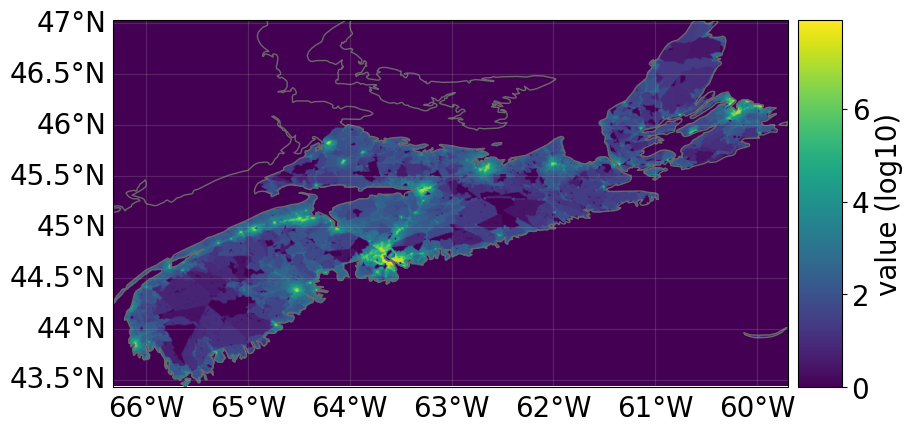

In [5]:
#Plot_raster method
from climada.util.plot import add_cntry_names # use climada's plotting utilities
ax = exp_building.plot_raster(); # plot with same resolution as data
add_cntry_names(ax, [exp_building.gdf.longitude.min(), exp_building.gdf.longitude.max(), exp_building.gdf.latitude.min(), exp_building.gdf.latitude.max()])

# use keyword argument save_tiff='filepath.tiff' to save the corresponding raster in tiff format
# use keyword argument raster_res='desired number' to change resolution of the raster.

<GeoAxesSubplot:title={'center':'LitPop Exposure for custom shape at 30 as, year: 2022, exp: (1, 1)'}>

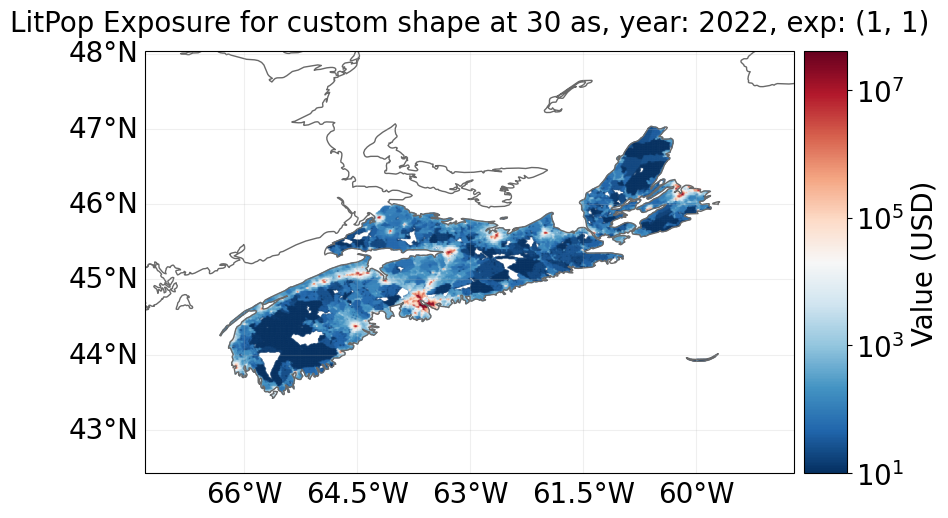

In [6]:
#Plot Building Exposure Map
norm = colors.LogNorm(vmin=10, vmax=4.0e7)

exp_building.plot_hexbin(norm=norm, pop_name=False, cmap='RdBu_r', buffer=1)

In [7]:
#Save Building Exposure File
import fiona; fiona.supported_drivers
from climada import CONFIG
results = CONFIG.local_data.save_dir.dir()

# write as hdf5 file
exp_building.write_hdf5(results.joinpath('exp_building.h5'))

['British Columbia', 'Alberta', 'Saskatchewan', 'Manitoba', 'Ontario', 'Québec', 'New Brunswick', 'Yukon', 'Nunavut', 'Newfoundland and Labrador', 'Nova Scotia', 'Northwest Territories', 'Prince Edward Island']
Nova Scotia index: 10

 Runtime `from_population` : 10.67 sec.



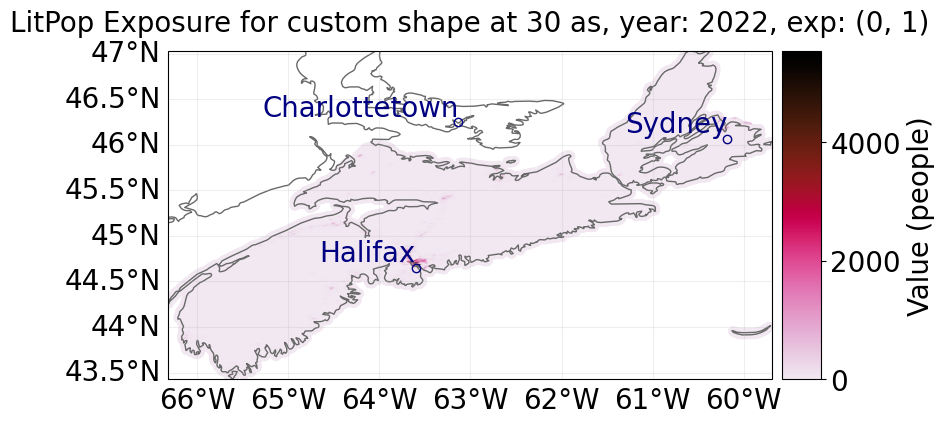

In [8]:
#Construct Exposure 2
#People

import time
import climada.util.coordinates as u_coord
import climada.entity.exposures.litpop as lp

country_iso3a = 'CAN'
state_name = 'Nova Scotia'
reslution_arcsec = 200
"""First, we need to get the shape of Nova Scotia:"""
admin1_info, admin1_shapes = u_coord.get_admin1_info(country_iso3a)
admin1_info = admin1_info[country_iso3a]
admin1_shapes = admin1_shapes[country_iso3a]
admin1_names = [record['name'] for record in admin1_info]
print(admin1_names)
for idx, name in enumerate(admin1_names):
    if admin1_names[idx]==state_name:
        break
print('Nova Scotia index: ' + str(idx))

start = time.process_time()
exp_pop = LitPop.from_population(shape=admin1_shapes[idx], reference_year=2022)
print(f'\n Runtime `from_population` : {time.process_time() - start:1.2f} sec.\n')
exp_pop.plot_scatter();

<GeoAxesSubplot:title={'center':'LitPop Exposure for custom shape at 30 as, year: 2022, exp: (0, 1)'}>

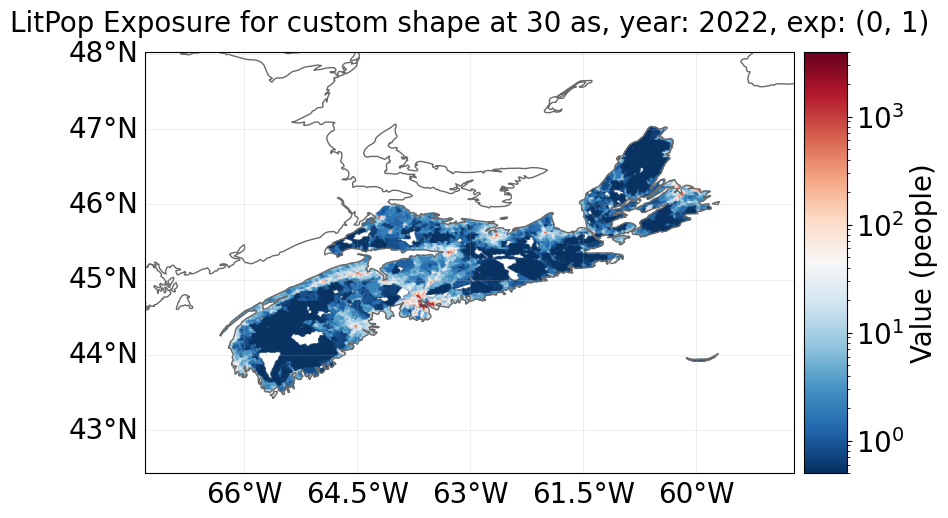

In [9]:
#Plot People Exposure
norm = colors.LogNorm(vmin=0.5, vmax=4.0e3)

exp_pop.plot_hexbin(norm=norm, pop_name=False, cmap='RdBu_r', buffer=1)

In [10]:
#Save People Exposure File
import fiona; fiona.supported_drivers
from climada import CONFIG
results = CONFIG.local_data.save_dir.dir()

# write as hdf5 file
exp_pop.write_hdf5(results.joinpath('exp_pop.h5'))

In [11]:
#Simulate Hazard for climate scenarios

#Define paths and file names

# Wind
fl_HAZ_tc = fl_HAZ_tc_cc0 # This path is defined in Configuration.py, indicating the wind hazard under current climate scenario.

fl_HAZ_tc_45 = os.path.join(project_folder, 'HAZ_tc_cc45' + country + file_identifier + '.hdf5')

fl_HAZ_tc_85 = os.path.join(project_folder, 'HAZ_tc_cc85' + country + file_identifier + '.hdf5')


# Surge
fl_HAZ_ts = os.path.join(project_folder, 'HAZ_ts_cc0' + country + file_identifier + '.hdf5')

fl_HAZ_ts_45 = os.path.join(project_folder, 'HAZ_ts_cc45' + country + file_identifier + '.hdf5')

fl_HAZ_ts_85 = os.path.join(project_folder, 'HAZ_ts_cc85' + country + file_identifier + '.hdf5')

2023-08-17 13:24:34,231 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2022-05-03 17:22:57 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file C:\Users\PLN\climada\data\IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.


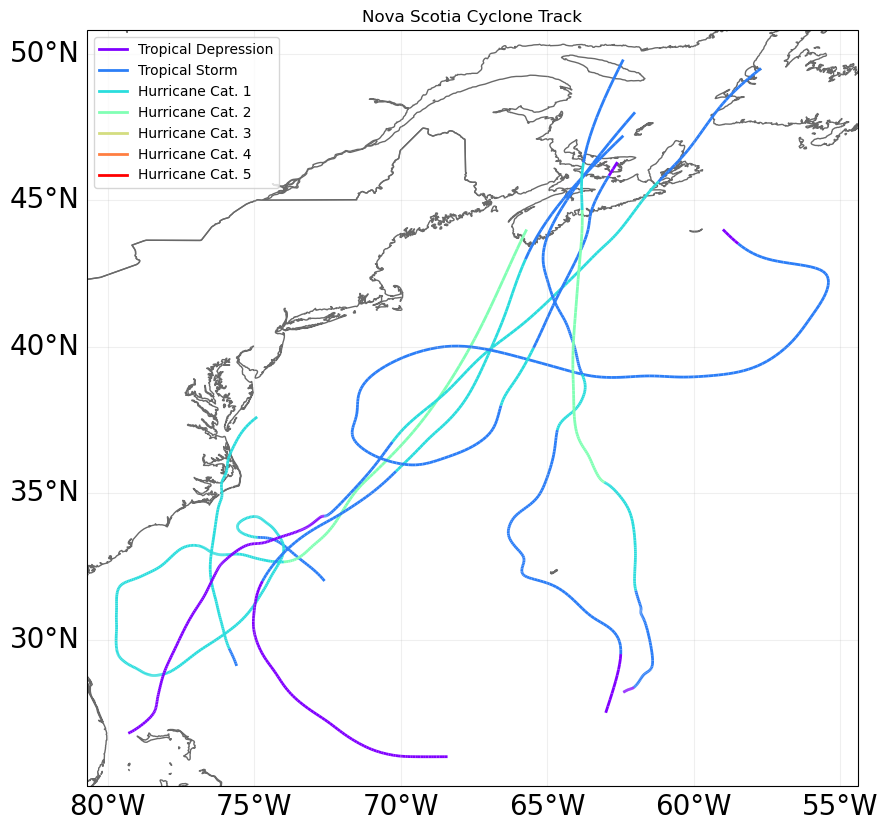

In [12]:
#Generate synthetic wind of tropical cyclones

%matplotlib inline
# 1: tracks retrieval
from climada.hazard import TCTracks

tr_usa = TCTracks.from_ibtracs_netcdf(provider='usa', storm_id=['2003268N28298', '1991302N44301', '2001284N28297', '1971223N27280', '1975205N26292', '1963291N26288', '1953223N23286']) # CAN 2003 
tr_usa.equal_timestep(0.5)
ax = tr_usa.plot()
ax.get_legend()._loc = 2 # correct legend location
ax.set_title('Nova Scotia Cyclone Track'); # set title

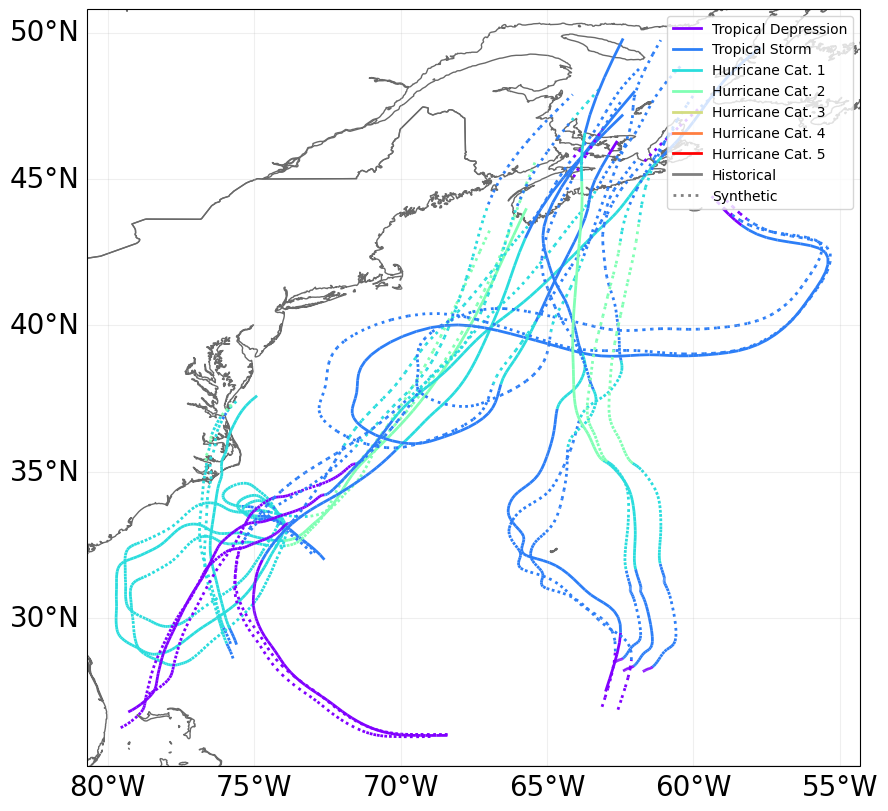

In [13]:
#Generate Probabilistic Events

# here we use tr_irma retrieved from IBTrACS with the function above
# select number of synthetic tracks (nb_synth_tracks) to generate per present tracks.
tr_usa.equal_timestep()
tr_usa.calc_perturbed_trajectories(nb_synth_tracks=2)
tr_usa.plot();
# see more configutration options (e.g. amplitude of max random starting point shift in decimal degree; max_shift_ini)

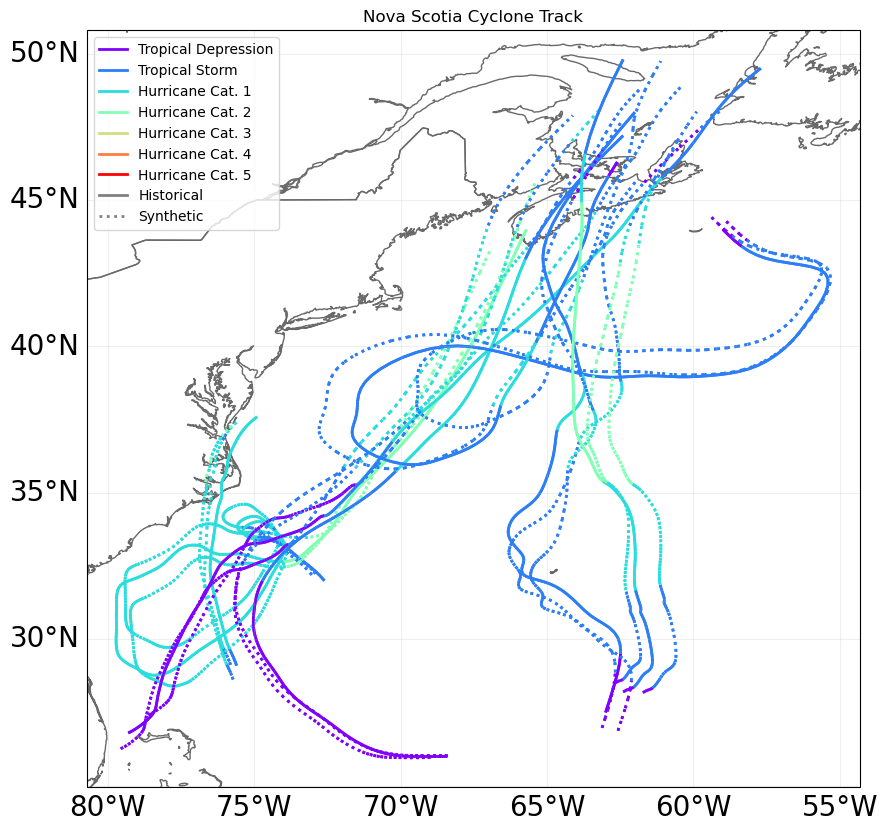

In [14]:
#tracks retrieval
from climada.hazard import TCTracks

tr_usa.append(tr_usa.data) # put both tracks together
ax = tr_usa.plot()
ax.get_legend()._loc = 2 # correct legend location
ax.set_title('Nova Scotia Cyclone Track'); # set title

In [15]:
# 2: wind gusts computation
from climada.hazard import TropCyclone, Centroids

# define centroids raster
min_lat, max_lat, min_lon, max_lon = 43.3, 47.1, -66.5, -59.5
cent_ns = Centroids.from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res=0.03)
cent_ns.set_dist_coast(signed=True, precomputed=True)
cent_ns.check()

tc_ns = TropCyclone.from_tracks(tr_usa, centroids=cent_ns, ignore_distance_to_coast=True)

In [33]:
# 3: surge computation
from climada_petals.hazard import TCSurgeBathtub
from climada.util.constants import DEMO_DIR

# If you have the global SRTM15+V2.0 elevation data set, you can replace the following
# sample DEM data set by your SRTM15+V2.0.tiff:
topo_path = DEMO_DIR.joinpath('SRTM15+V2.tiff')
ts_ns = TCSurgeBathtub.from_tc_winds(tc_ns, topo_path, inland_decay_rate=0.2, add_sea_level_rise=0)

CPLE_OutOfMemoryError: d:\bld\gdal-split_1655481962629\work\frmts\mem\memdataset.cpp, 1247: cannot allocate 1x1287151012 bytes

<GeoAxesSubplot:>

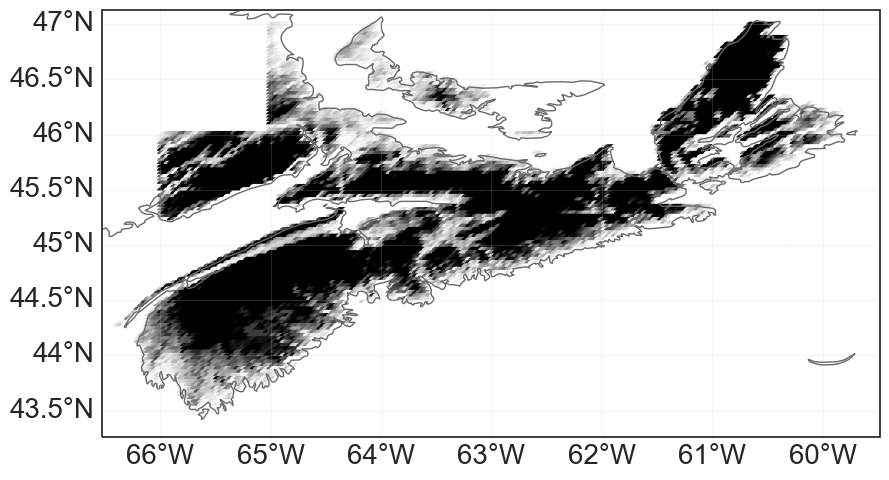

In [394]:
# plot elevation of the raster
ts_ns.centroids.set_elevation(topo_path)
ts_ns.centroids.plot(c=ts_ns.centroids.elevation, vmin=0, vmax=100)

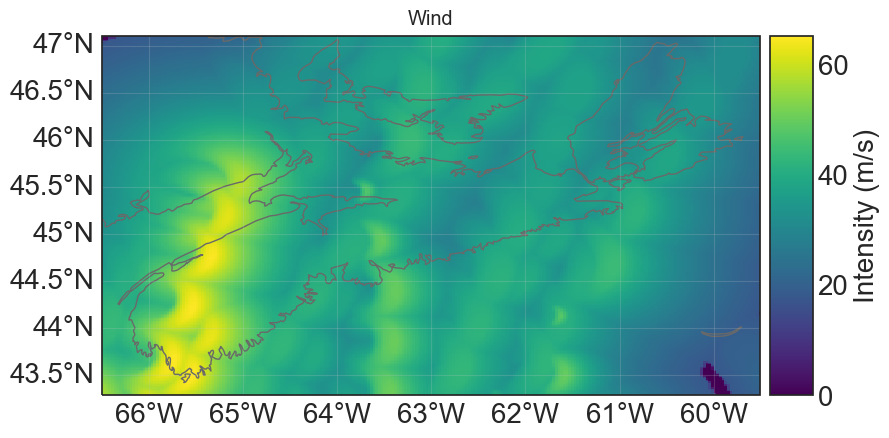

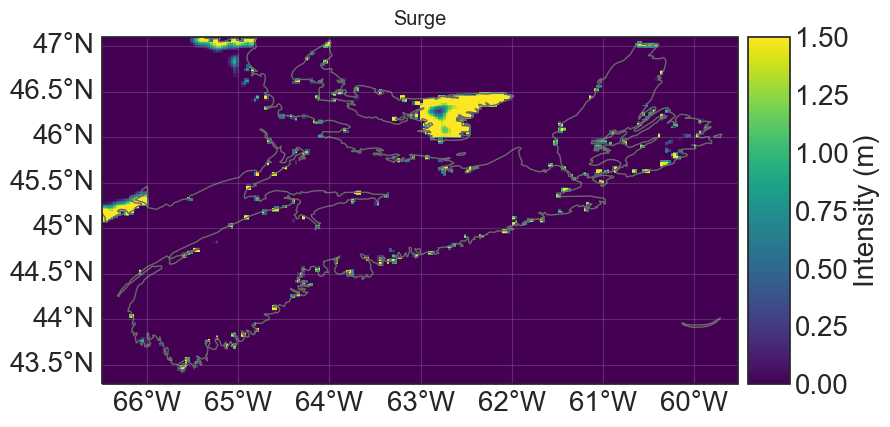

In [395]:
# plot wind and surge cyclone
norm = colors.LogNorm(vmin=1, vmax=5.0e7)

ax = tc_ns.plot_intensity(event=0, adapt_fontsize=True)
ax.set_title('Wind')
ax = ts_ns.plot_intensity(event=0, vmax=1.5, adapt_fontsize=True)
ax.set_title('Surge');

In [432]:
tr_usa.data[-1] # last synthetic track. notice the value of orig_event_flag and name

<xarray.Dataset>
Dimensions:                 (time: 121)
Coordinates:
  * time                    (time) datetime64[ns] 2003-09-24T12:00:00 ... 200...
    lon                     (time) float64 -62.05 -62.01 -61.98 ... -60.6 -60.2
    lat                     (time) float64 27.81 27.83 27.85 ... 48.29 48.94
Data variables:
    time_step               (time) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    radius_max_wind         (time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    radius_oci              (time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    max_sustained_wind      (time) float64 25.0 25.67 26.33 ... 63.57 60.24 56.9
    central_pressure        (time) float64 1.009e+03 1.009e+03 ... 991.3 993.6
    environmental_pressure  (time) float64 1.012e+03 1.012e+03 ... 1.005e+03
    basin                   (time) <U2 'NA' 'NA' 'NA' 'NA' ... 'NA' 'NA' 'NA'
    on_land                 (time) bool False False False ... False False False
    dist_since_lf           (time) float64 nan nan nan nan ... nan nan nan nan
Attributes:
    max_sustained_wind_unit:  kn
    central_pressure_unit:    mb
    name:                     JUAN_gen2
    sid:                      2003268N28298_gen2
    orig_event_flag:          False
    data_provider:            ibtracs_usa
    id_no:                    2003268028298.02
    category:                 2

In [289]:
# This functionality is part of climada_petals, uncomment to execute
from climada_petals.hazard import TCForecast

tc_fcast = TCForecast()
tc_fcast.fetch_ecmwf()

print(tc_fcast.data[0])

2022-11-05 15:54:34,279 - climada_petals.hazard.tc_tracks_forecast - INFO - Fetching BUFR tracks:


Processing: 100%|██████████████████████████████████████████████████████████████████| 42/42 [00:08<00:00,  4.96 files/s]

<xarray.Dataset>
Dimensions:                 (time: 10)
Coordinates:
  * time                    (time) datetime64[ns] 2022-10-25T12:00:00 ... 202...
    lat                     (time) float64 -15.3 -15.5 -15.6 ... -16.1 -15.9
    lon                     (time) float64 -176.7 -177.8 ... -174.4 -174.6
Data variables:
    max_sustained_wind      (time) float64 13.9 14.9 13.4 ... 14.4 17.0 13.9
    central_pressure        (time) float64 1.007e+03 1.006e+03 ... 1.006e+03
    time_step               (time) int32 180 6 6 6 6 6 6 6 6 6
    radius_max_wind         (time) float64 nan nan nan nan ... nan nan nan nan
    environmental_pressure  (time) float64 1.01e+03 1.01e+03 ... 1.01e+03
    basin                   (time) <U2 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P' 'P'
Attributes:
    max_sustained_wind_unit:  m/s
    central_pressure_unit:    mb
    name:                     73P
    sid:                      73P
    orig_event_flag:          False
    data_provider:            ECMWF
    id_no:    

(array([[<GeoAxesSubplot:title={'center':'Return period: 10 years'}>,
         <GeoAxesSubplot:title={'center':'Return period: 25 years'}>],
        [<GeoAxesSubplot:title={'center':'Return period: 50 years'}>,
         <GeoAxesSubplot:title={'center':'Return period: 100 years'}>]],
       dtype=object),
 array([[ 0.        ,  0.        ,  0.        , ..., 15.91567055,
         16.22658679, 16.54758412],
        [ 0.        ,  0.        ,  0.        , ..., 17.2177149 ,
         17.51008887, 17.8091928 ],
        [ 0.        ,  0.        ,  0.        , ..., 18.20267343,
         18.48102072, 18.76356293],
        [ 0.        ,  0.        ,  0.        , ..., 19.18763196,
         19.45195256, 19.71793306]]))

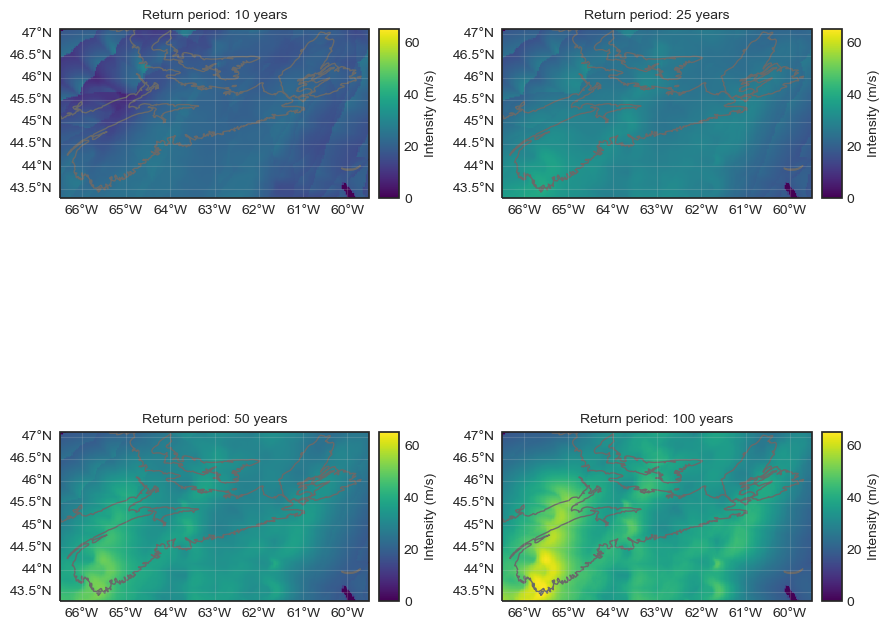

In [396]:
tc_ns.plot_rp_intensity(return_periods = [10, 25, 50, 100])

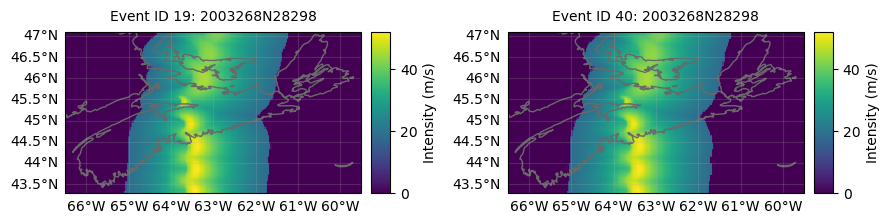

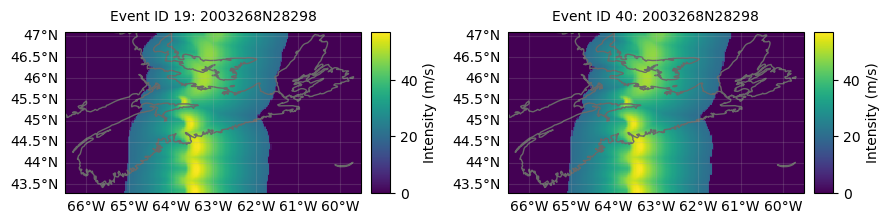

In [22]:
#Implementing Climate Change Cyclone

# an event-like in 2055 under SSP 4.5:
tc_usa = TropCyclone.from_tracks(tr_usa, centroids=cent_ns)
HAZ_tc_cc45 = tc_usa.apply_climate_scenario_knu(ref_year=2055, ssp_scenario=45)
HAZ_tc_cc45.plot_intensity('2003268N28298');

# an event-like in 2055 under SSP 8.5:
tc_usa = TropCyclone.from_tracks(tr_usa, centroids=cent_ns)
HAZ_tc_cc85 = tc_usa.apply_climate_scenario_knu(ref_year=2100, ssp_scenario=85)
HAZ_tc_cc85.plot_intensity('2003268N28298');


In [16]:
#Create Impact Function
#Impact Function

import numpy as np
from matplotlib import colors
from Configuration import *
import os

from climada.entity import IFTropCyclone, ImpactFuncSet, ImpactFunc

In [17]:
# Impact function buildings

IFs_TC_building = ImpactFuncSet()

if_tc = IFTropCyclone()
if_tc.haz_type = 'TC'
if_tc.id = 1
if_tc.intensity_unit = 'm/s'
if_tc.intensity = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80])
if_tc.mdd = np.array([0, 0, 0, 0, 0.05, 0.20, 0.45, 0.65, 0.78])
if_tc.paa = np.ones(9)
if_tc.check()

IFs_TC_building.append(if_tc)


# Impact function people

IFs_TC_people = ImpactFuncSet()

if_tc_people = IFTropCyclone()
if_tc_people.haz_type = 'TC'
if_tc_people.id = 1
if_tc_people.intensity_unit = 'm/s'

if_tc_people.intensity = np.arange(0, 100, 0.5)
if_tc_people.paa = np.ones(if_tc_people.intensity.size)
if_tc_people.mdd = np.zeros(if_tc_people.intensity.size)
for idx in range(if_tc_people.mdd.size):
    if if_tc_people.intensity[idx] >= 0.65*storm_threshold:
        if_tc_people.mdd[idx] = 1

if_tc_people.check()

IFs_TC_people.append(if_tc_people)

<AxesSubplot:title={'center':'TC 1: '}, xlabel='Intensity (m/s)', ylabel='Impact (%)'>

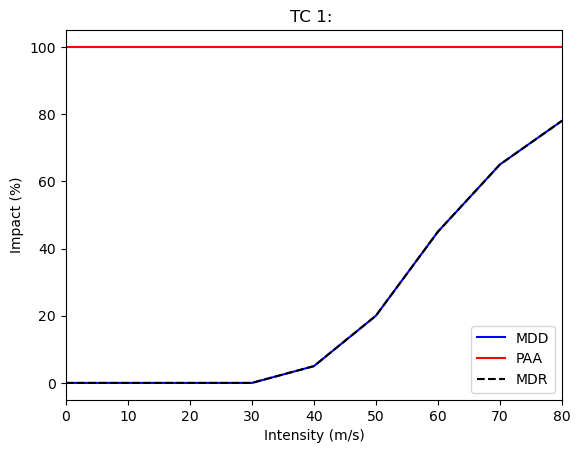

In [18]:
IFs_TC_building.plot()

<AxesSubplot:title={'center':'TC 1: Emanuel 2011'}, xlabel='Intensity (m/s)', ylabel='Impact (%)'>

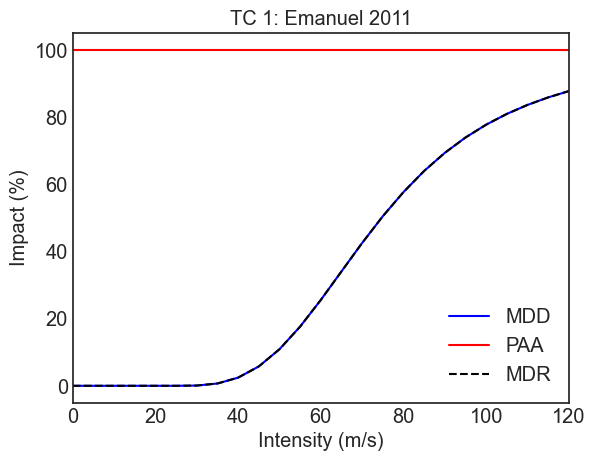

In [403]:
#calibrated impact functions from Emanuel (2011)
# Impact function building

from climada.entity import ImpactFuncSet, ImpfTropCyclone
# impact function TC
impf_tc = ImpfTropCyclone.from_emanuel_usa()

# add the impact function to an Impact function set
IFs_TC_building_2 = ImpactFuncSet()
IFs_TC_building_2.append(impf_tc)
IFs_TC_building_2.check()

IFs_TC_building_2.plot()

In [404]:
#check Impact function building
# Get the hazard type and hazard id
[haz_type] = IFs_TC_building_2.get_hazard_types()
[haz_id] = IFs_TC_building_2.get_ids()[haz_type]
print(f"hazard type: {haz_type}, hazard id: {haz_id}")

hazard type: TC, hazard id: 1


In [405]:
# Exposures: rename column and assign id
exp_building.gdf.rename(columns={"impf_": "impf_" + haz_type}, inplace=True)
exp_building.gdf['impf_' + haz_type] = haz_id
exp_building.check()
exp_building.gdf.head()

value                    geometry   latitude  longitude  region_id  \
1485  22.595200  POINT (-60.60417 47.02917)  47.029167 -60.604167        124   
1486  22.595199  POINT (-60.59583 47.02917)  47.029167 -60.595833        124   
1487  22.595199  POINT (-60.58750 47.02917)  47.029167 -60.587500        124   
1488  22.595199  POINT (-60.57917 47.02917)  47.029167 -60.579167        124   
2282  22.598727  POINT (-60.61250 47.02083)  47.020833 -60.612500        124   

      impf_TC  
1485        1  
1486        1  
1487        1  
1488        1  
2282        1

In [406]:
exp_building.gdf.head()

value                    geometry   latitude  longitude  region_id  \
1485  22.595200  POINT (-60.60417 47.02917)  47.029167 -60.604167        124   
1486  22.595199  POINT (-60.59583 47.02917)  47.029167 -60.595833        124   
1487  22.595199  POINT (-60.58750 47.02917)  47.029167 -60.587500        124   
1488  22.595199  POINT (-60.57917 47.02917)  47.029167 -60.579167        124   
2282  22.598727  POINT (-60.61250 47.02083)  47.020833 -60.612500        124   

      impf_TC  
1485        1  
1486        1  
1487        1  
1488        1  
2282        1

<AxesSubplot:title={'center':'TC 1: '}, xlabel='Intensity (m/s)', ylabel='Impact (%)'>

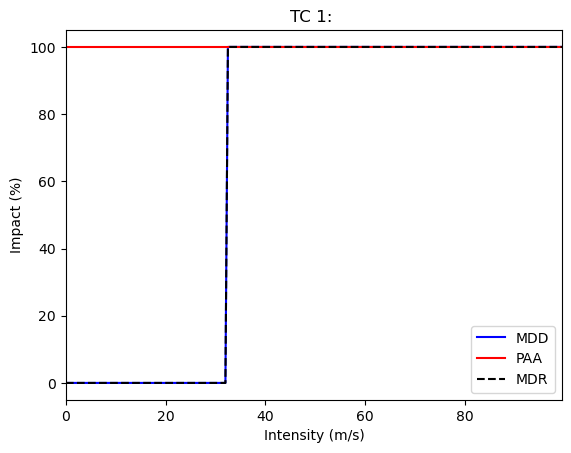

In [80]:
IFs_TC_people.plot()

In [335]:
# Exposures: rename column and assign id
exp_building.gdf.rename(columns={"impf_": "impf_"}, inplace=True)
exp_building.gdf['impf_'] = haz_id
exp_building.check()
exp_building.gdf.head()

value                    geometry   latitude  longitude  region_id  \
1485  22.595200  POINT (-60.60417 47.02917)  47.029167 -60.604167        124   
1486  22.595199  POINT (-60.59583 47.02917)  47.029167 -60.595833        124   
1487  22.595199  POINT (-60.58750 47.02917)  47.029167 -60.587500        124   
1488  22.595199  POINT (-60.57917 47.02917)  47.029167 -60.579167        124   
2282  22.598727  POINT (-60.61250 47.02083)  47.020833 -60.612500        124   

      impf_TC  centr_TC  impf_  centr_  
1485        1       665      1      -1  
1486        1       665      1      -1  
1487        1       665      1      -1  
1488        1       665      1      -1  
2282        1       898      1      -1

In [336]:
exp_building.gdf.head()

value                    geometry   latitude  longitude  region_id  \
1485  22.595200  POINT (-60.60417 47.02917)  47.029167 -60.604167        124   
1486  22.595199  POINT (-60.59583 47.02917)  47.029167 -60.595833        124   
1487  22.595199  POINT (-60.58750 47.02917)  47.029167 -60.587500        124   
1488  22.595199  POINT (-60.57917 47.02917)  47.029167 -60.579167        124   
2282  22.598727  POINT (-60.61250 47.02083)  47.020833 -60.612500        124   

      impf_TC  centr_TC  impf_  centr_  
1485        1       665      1      -1  
1486        1       665      1      -1  
1487        1       665      1      -1  
1488        1       665      1      -1  
2282        1       898      1      -1

In [20]:
##Calculate Impact

from climada.engine import Impact

In [23]:
# Buildings
IMP_building_TC = Impact()
IMP_building_TC.calc(exp_building, IFs_TC_building, tc_ns)

IMP_building_TC_45 = Impact()
IMP_building_TC_45.calc(exp_building, IFs_TC_building, HAZ_tc_cc45)

IMP_building_TC_85 = Impact()
IMP_building_TC_85.calc(exp_building, IFs_TC_building, HAZ_tc_cc85)

2023-08-17 13:29:04,031 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-08-17 13:29:04,190 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-08-17 13:29:04,233 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.


Expected average annual impact (houses TC): 8.779e+06 USD
Damage with 100-year return period: 3.870e+08 USD


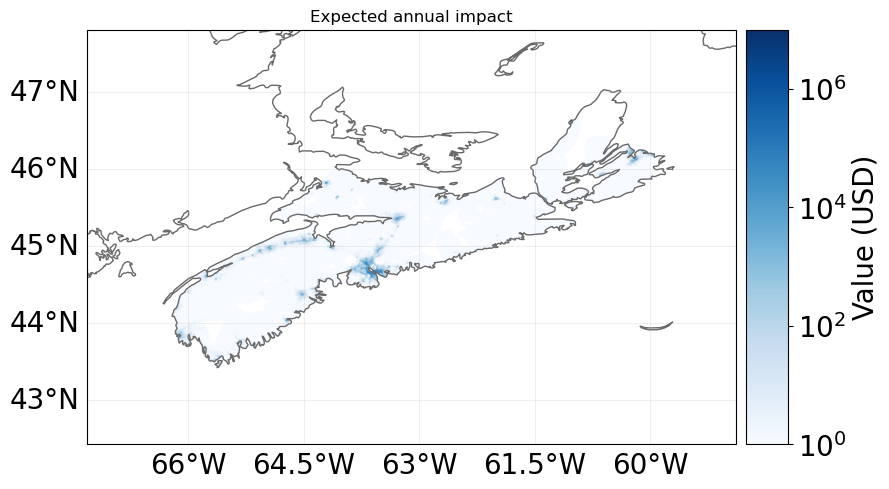

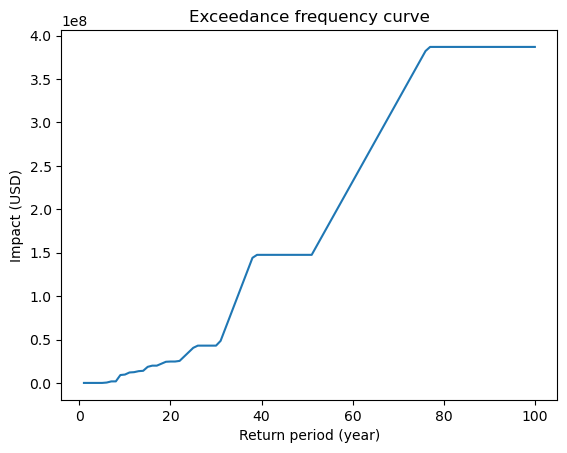

In [24]:
#Impact Map and Return Period Graph
#An example of plotting annual average loss map, exceedance frequency curves and reporting the damage of given return period.

norm = colors.LogNorm(vmin=1, vmax=1.0e7)
IMP_building_TC.plot_hexbin_eai_exposure(pop_name=False, norm=norm, cmap='Blues', buffer=1, ignore_zero=True, adapt_fontsize=True)
freq_curve_building_TC = IMP_building_TC.calc_freq_curve(np.linspace(1, 100, 100))  # impact exceedence frequency curve
freq_curve_building_TC.plot()
print('Expected average annual impact (houses TC): {:.3e} USD'.format(IMP_building_TC.aai_agg))
print('Damage with 100-year return period: {:.3e} USD'.format(IMP_building_TC.calc_freq_curve(100).impact))

In [32]:
# Compute impact Emanuela
from climada.engine import Impact
imp2 = Impact()
imp2.calc(exp_building, IFs_TC_building_2, tc_ns, save_mat=False) #Do not save the results geographically resolved (only aggregate values)

2022-11-09 18:32:41,233 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2022-11-09 18:32:41,234 - climada.entity.exposures.base - INFO - Exposures matching centroids already found for TC
2022-11-09 18:32:41,235 - climada.entity.exposures.base - INFO - Existing centroids will be overwritten for TC
2022-11-09 18:32:41,236 - climada.entity.exposures.base - INFO - Matching 90846 exposures with 29952 centroids.
2022-11-09 18:32:41,246 - climada.engine.impact_calc - INFO - Calculating impact for 90846 assets (>0) and 42 events.


In [33]:
exp_building.gdf

value                    geometry   latitude  longitude  \
1485      18.698382  POINT (-60.60417 47.02917)  47.029167 -60.604167   
1486      18.698380  POINT (-60.59583 47.02917)  47.029167 -60.595833   
1487      18.698380  POINT (-60.58750 47.02917)  47.029167 -60.587500   
1488      18.698380  POINT (-60.57917 47.02917)  47.029167 -60.579167   
2282      18.701300  POINT (-60.61250 47.02083)  47.020833 -60.612500   
...             ...                         ...        ...        ...   
344821  4843.284710  POINT (-65.62083 43.43750)  43.437500 -65.620833   
344822  2120.003420  POINT (-65.61250 43.43750)  43.437500 -65.612500   
344823  2162.010773  POINT (-65.60417 43.43750)  43.437500 -65.604167   
345619  1905.741974  POINT (-65.62083 43.42917)  43.429167 -65.620833   
345620  1920.558730  POINT (-65.61250 43.42917)  43.429167 -65.612500   

        region_id  impf_TC  centr_TC  
1485          124        1       665  
1486          124        1       665  
1487          124        1       665  
1488          124        1       665  
2282          124        1       898  
...           ...      ...       ...  
344821        124        1     28577  
344822        124        1     28578  
344823        124        1     28578  
345619        124        1     28577  
345620        124        1     28578  

[90846 rows x 7 columns]

In [34]:
print(f"Aggregated average annual impact: {round(imp2.aai_agg,0)} $")

Aggregated average annual impact: 2944472.0 $


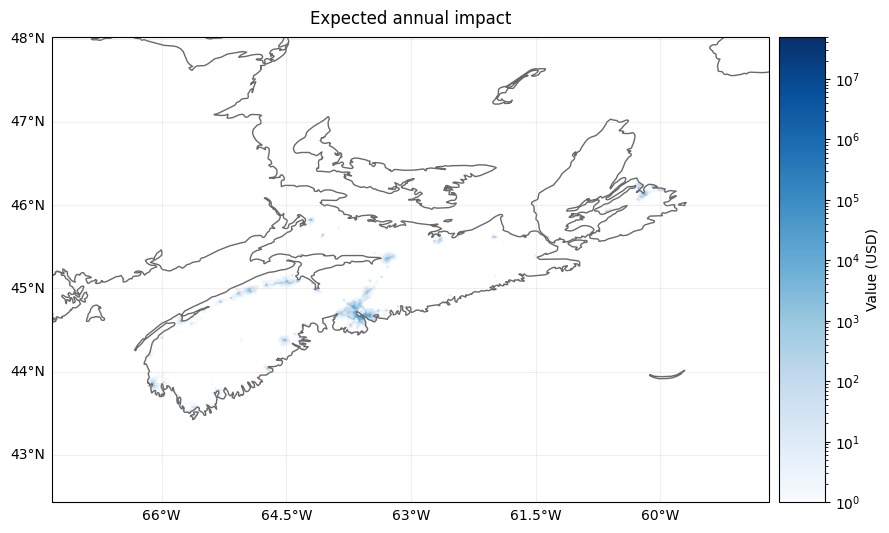

In [124]:
norm = colors.LogNorm(vmin=1, vmax=5.0e7)
imp2.plot_hexbin_eai_exposure(pop_name=False, norm=norm, cmap=cmap, buffer=1, ignore_zero=False, adapt_fontsize=False);

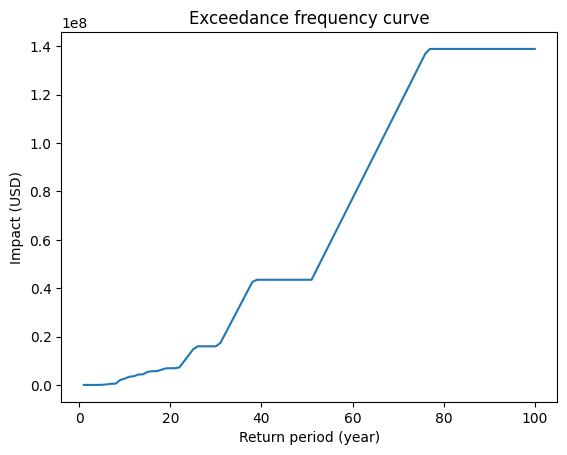

In [36]:
# Compute exceedance frequency curve
freq_curve = imp2.calc_freq_curve(np.linspace(1, 100, 100))
freq_curve.plot();

Expected average annual impact (houses TC): 1.134e+07 USD
Damage with 100-year return period: 4.804e+08 USD


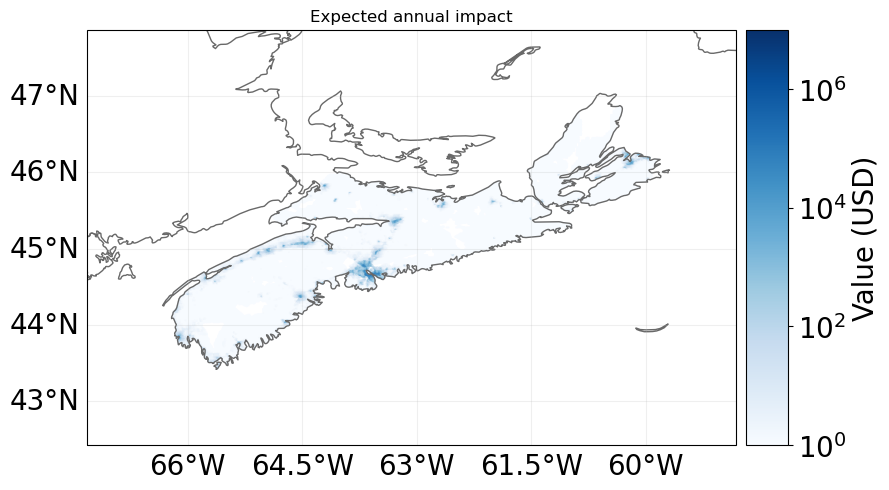

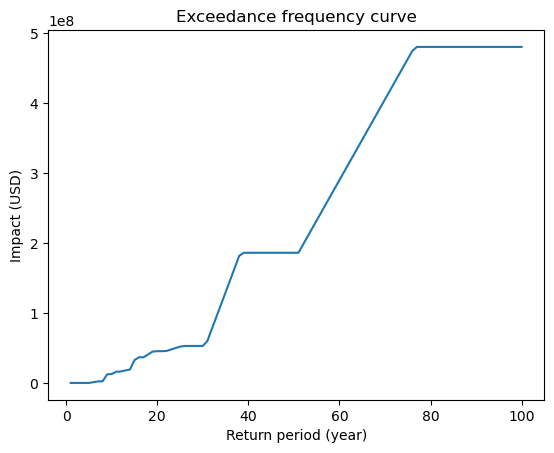

In [25]:
#Impact Map and Return Period Graph TC_45
#An example of plotting annual average loss map, exceedance frequency curves and reporting the damage of given return period.

norm = colors.LogNorm(vmin=1, vmax=1.0e7)
IMP_building_TC_45.plot_hexbin_eai_exposure(pop_name=False, norm=norm, cmap='Blues', buffer=1, ignore_zero=True, adapt_fontsize=True)
freq_curve_building_TC_45 = IMP_building_TC_45.calc_freq_curve(np.linspace(1, 100, 100))  # impact exceedence frequency curve
freq_curve_building_TC_45.plot()
print('Expected average annual impact (houses TC): {:.3e} USD'.format(IMP_building_TC_45.aai_agg))
print('Damage with 100-year return period: {:.3e} USD'.format(IMP_building_TC_45.calc_freq_curve(100).impact))

Expected average annual impact (houses TC): 1.918e+07 USD
Damage with 100-year return period: 7.337e+08 USD


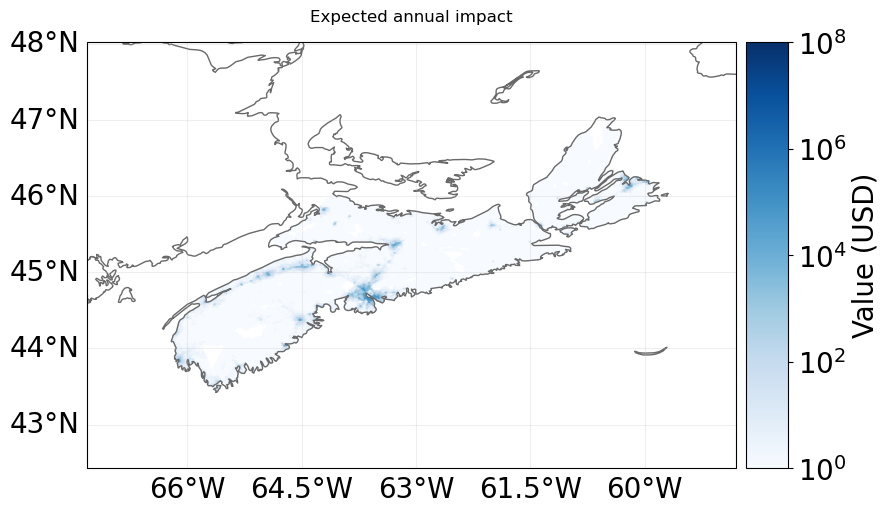

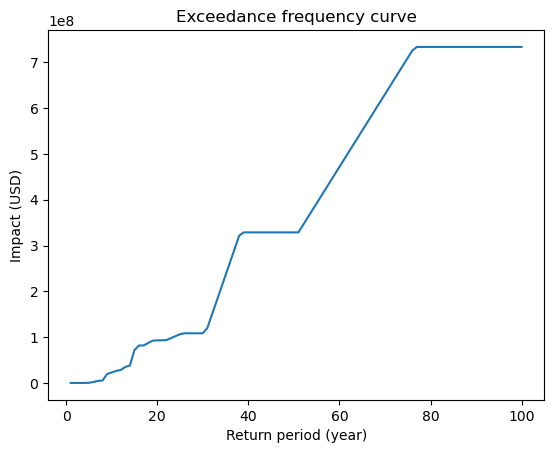

In [28]:
#Impact Map and Return Period Graph TC_85
#An example of plotting annual average loss map, exceedance frequency curves and reporting the damage of given return period.

norm = colors.LogNorm(vmin=1, vmax=1.0e8)
IMP_building_TC_85.plot_hexbin_eai_exposure(pop_name=False, norm=norm, cmap='Blues', buffer=1, ignore_zero=True, adapt_fontsize=True)
freq_curve_building_TC_85 = IMP_building_TC_85.calc_freq_curve(np.linspace(1, 100, 100))  # impact exceedence frequency curve
freq_curve_building_TC_85.plot()
print('Expected average annual impact (houses TC): {:.3e} USD'.format(IMP_building_TC_85.aai_agg))
print('Damage with 100-year return period: {:.3e} USD'.format(IMP_building_TC_85.calc_freq_curve(100).impact))

In [81]:
##Calculate Impact on People

from climada.engine import Impact

In [82]:
## Calculate impact
# People

IMP_people_TC = Impact()
IMP_people_TC.calc(exp_pop, IFs_TC_people, tc_ns)

IMP_people_TC_45 = Impact()
IMP_people_TC_45.calc(exp_pop, IFs_TC_people, HAZ_tc_cc45)

IMP_people_TC_85 = Impact()
IMP_people_TC_85.calc(exp_pop, IFs_TC_people, HAZ_tc_cc85)

2023-08-07 11:48:44,326 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-08-07 11:48:44,490 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-08-07 11:48:44,541 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.


Expected average annual impact (houses TC): 2.549e+04 people
Damage with 100-year return period: 5.644e+05 people


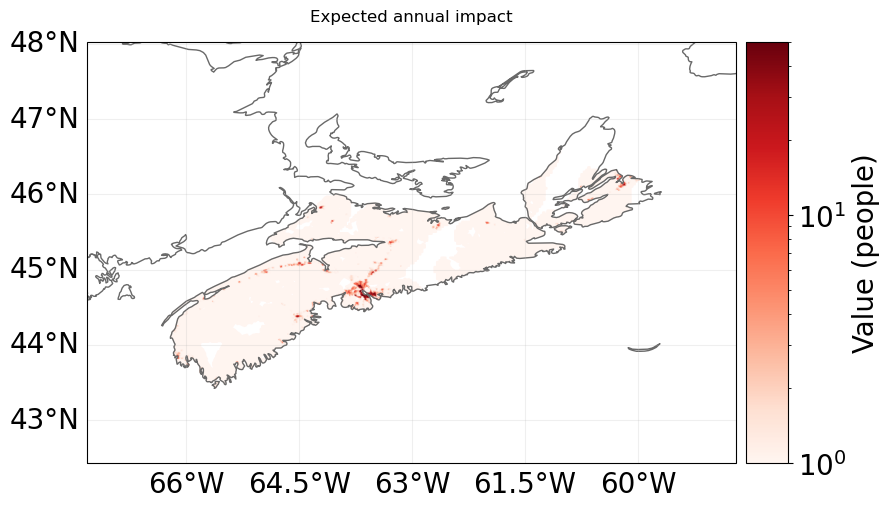

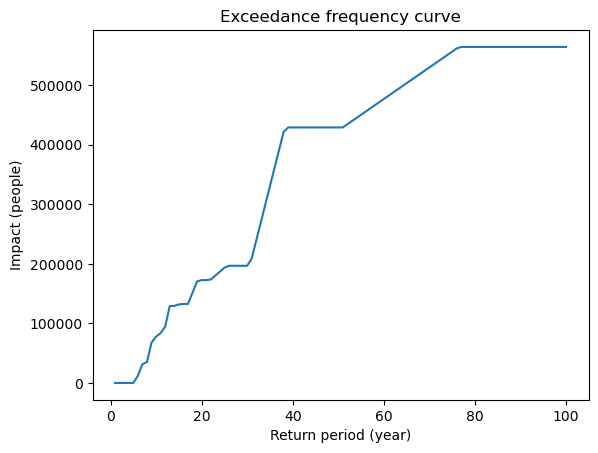

In [107]:
#Impact Map and Return Period Graph
#An example of plotting annual average loss map, exceedance frequency curves and reporting the damage of given return period.

norm = colors.LogNorm(vmin=1, vmax=50)
IMP_people_TC.plot_hexbin_eai_exposure(pop_name=False, norm=norm, cmap='Reds', buffer=1, ignore_zero=False, adapt_fontsize=True)
freq_curve_people_TC = IMP_people_TC.calc_freq_curve(np.linspace(1, 100, 100))  # impact exceedence frequency curve
freq_curve_people_TC.plot()
print('Expected average annual impact (houses TC): {:.3e} people'.format(IMP_people_TC.aai_agg))
print('Damage with 100-year return period: {:.3e} people'.format(IMP_people_TC.calc_freq_curve(100).impact))

Expected average annual impact (houses TC): 2.896e+04 people
Damage with 100-year return period: 5.839e+05 people


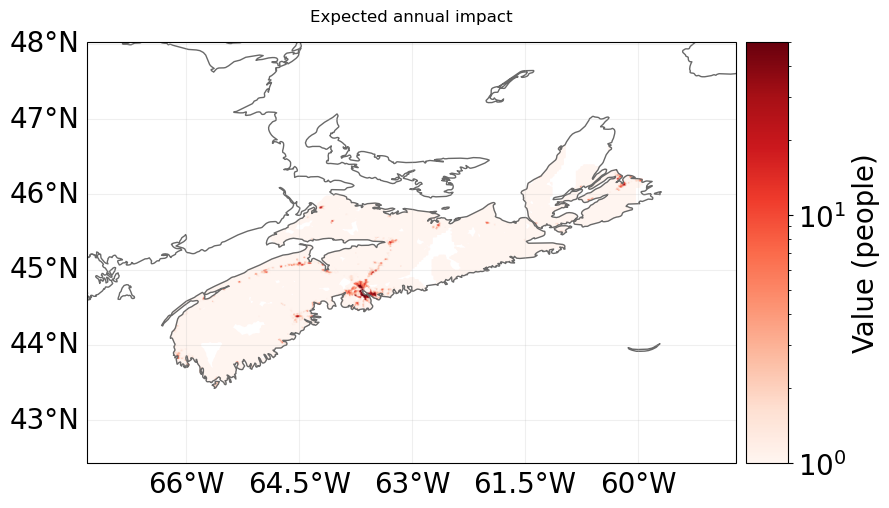

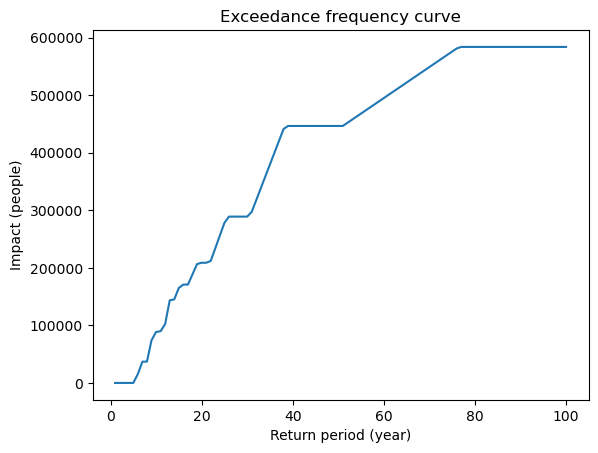

In [106]:
#Impact Map and Return Period Graph TC_45
#An example of plotting annual average loss map, exceedance frequency curves and reporting the damage of given return period.

norm = colors.LogNorm(vmin=1, vmax=50)
IMP_people_TC_45.plot_hexbin_eai_exposure(pop_name=False, norm=norm, cmap='Reds', buffer=1, ignore_zero=False, adapt_fontsize=True)
freq_curve_people_TC_45 = IMP_people_TC_45.calc_freq_curve(np.linspace(1, 100, 100))  # impact exceedence frequency curve
freq_curve_people_TC_45.plot()
print('Expected average annual impact (houses TC): {:.3e} people'.format(IMP_people_TC_45.aai_agg))
print('Damage with 100-year return period: {:.3e} people'.format(IMP_people_TC_45.calc_freq_curve(100).impact))

Expected average annual impact (houses TC): 3.865e+04 people
Damage with 100-year return period: 6.230e+05 people


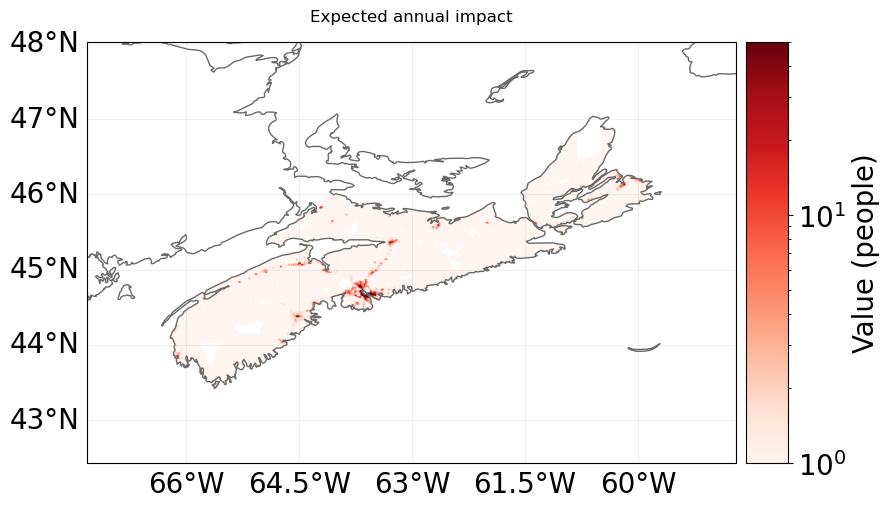

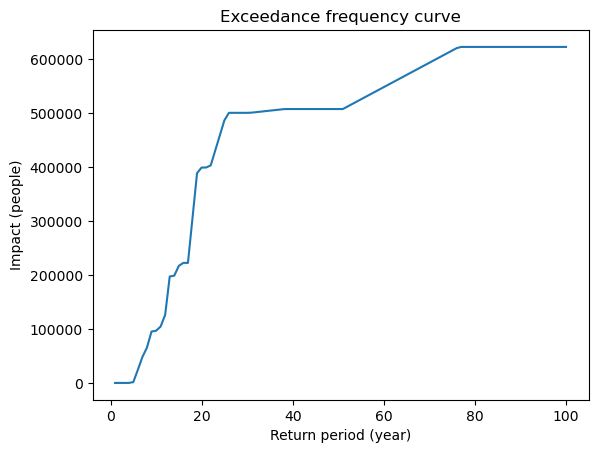

In [105]:
#Impact Map and Return Period Graph TC_85
#An example of plotting annual average loss map, exceedance frequency curves and reporting the damage of given return period.

norm = colors.LogNorm(vmin=1, vmax=50)
IMP_people_TC_85.plot_hexbin_eai_exposure(pop_name=False, norm=norm, cmap='Reds', buffer=1, ignore_zero=False, adapt_fontsize=True)
freq_curve_people_TC_85 = IMP_people_TC_85.calc_freq_curve(np.linspace(1, 100, 100))  # impact exceedence frequency curve
freq_curve_people_TC_85.plot()
print('Expected average annual impact (houses TC): {:.3e} people'.format(IMP_people_TC_85.aai_agg))
print('Damage with 100-year return period: {:.3e} people'.format(IMP_people_TC_85.calc_freq_curve(100).impact))

In [109]:
## Define adaptation measures

from climada.entity import Measure
from climada.entity import MeasureSet

In [141]:
# Measures seamarsh

TC_meas1 = Measure()
TC_meas1.name = 'Seamarsh'
TC_meas1.haz_type = 'TC'
TC_meas1.color_rgb = np.array([0.16, 0.62, 0.56])
seamarsh_maintain = 1500000
TC_meas1.cost = 150*1000000*0.000043*1160*1000*150/10000 + seamarsh_maintain * 30
TC_meas1.mdd_impact = (1, 0)
TC_meas1.paa_impact = (1, 0)
TC_meas1.hazard_inten_imp = (1, -7) 


TC_meas_set = MeasureSet()
TC_meas_set.append(TC_meas1)
TC_meas_set.check()

In [188]:
# Measures seadikes

TC_meas2 = Measure()
TC_meas2.name = 'Seadikes'
TC_meas2.haz_type = 'TC'
TC_meas2.color_rgb = np.array([0.16, 0.62, 0.56])
seadike_maintain = 200
TC_meas2.cost = 351000000 + 11000000 + seadike_maintain * 30 * 90
TC_meas2.mdd_impact = (1, 0)
TC_meas2.paa_impact = (1, 0)
TC_meas2.hazard_inten_imp = (1, -10) 


TC_meas2_set = MeasureSet()
TC_meas2_set.append(TC_meas2)
TC_meas2_set.check()

In [189]:
# Predict future risks, considering economic growth

from climada.entity import Entity
from climada.entity import DiscRates
import copy

In [190]:
# Construct discount rates

# discount rate for future values
disc = DiscRates()
disc.years = np.arange(2000, 2100)
disc.rates = np.ones(disc.years.size) * disc_rate

# number of people does not discount
people_disc = DiscRates()
people_disc.years = np.arange(2000, 2100)
people_disc.rates = np.zeros(people_disc.years.size)

In [191]:
# Current building entity

future_year = 2050


ENT_building = Entity()

ENT_building.exposures = exp_building

ENT_building.impact_funcs = IFs_TC_building

ENT_building.measures = TC_meas_set 

ENT_building.disc_rates = disc

ENT_building.check()

# Future building entity

EXP_building_future = copy.deepcopy(exp_house)

EXP_building_future.ref_year = future_year # asset_growth is parameter defined in Configuration.py

n_years = EXP_building_future.ref_year - exp_house.ref_year + 1

growth_rate = 1.05

growth = growth_rate ** n_years

EXP_building_future.gdf['value'] = EXP_building_future.gdf['value'] * growth 


ENT_building_future = copy.deepcopy(ENT_building)

ENT_building_future.exposures = EXP_building_future

ENT_building_future.exposures.ref_year = horizon

ENT_building_future.check()

In [192]:
# Current building entity seadike

future_year = 2050


ENT_building2 = Entity()

ENT_building2.exposures = exp_building

ENT_building2.impact_funcs = IFs_TC_building 

ENT_building2.measures = TC_meas2_set 

ENT_building2.disc_rates = disc

ENT_building2.check()

# Future building entity

EXP_building_future = copy.deepcopy(exp_building)

EXP_building_future.ref_year = future_year # asset_growth is parameter defined in Configuration.py

n_years = EXP_building_future.ref_year - exp_building.ref_year + 1

growth = growth_rate ** n_years

EXP_building_future.gdf['value'] = EXP_building_future.gdf['value'] * growth 


ENT_building2_future = copy.deepcopy(ENT_building2)

ENT_building2_future.exposures = EXP_building_future

ENT_building2_future.exposures.ref_year = horizon

ENT_building2_future.check()

In [193]:
# Current people entity

future_year = 2050


ENT_people = Entity()

ENT_people.exposures = exp_pop

ENT_people.impact_funcs = IFs_TC_people

ENT_people.measures = TC_meas_set

ENT_people.disc_rates = people_disc

ENT_people.check()

# Future people entity

EXP_people_future = copy.deepcopy(exp_pop)

EXP_people_future.ref_year = future_year # asset_growth is parameter defined in Configuration.py

n_years_pop = EXP_people_future.ref_year - exp_pop.ref_year + 1

growth = growth_rate_pop ** n_years_pop

EXP_people_future.gdf['value'] = EXP_people_future.gdf['value'] * growth 



#EXP_people_future ['value'] *= population_growth


ENT_people_future = copy.deepcopy(ENT_people)

ENT_people_future.exposures = EXP_people_future

ENT_people_future.exposures.ref_year = horizon

ENT_people_future.check()


In [194]:
## Calculating cost-benefit of adaptation measures, given Climate Change (SSP 8.5) and Economic Growth

from climada.engine import CostBenefit

In [195]:
# Seamarsh

cost_ben_building_TC = CostBenefit()

cost_ben_building_TC.calc(tc_ns, ENT_building, HAZ_tc_cc85, ENT_building_future, future_year=horizon)


Measure      Cost (USD m)    Benefit (USD m)    Benefit/Cost
---------  --------------  -----------------  --------------
Seamarsh           157.23             336.91         2.14278

--------------------  --------  -------
Total climate risk:   491.146   (USD m)
Average annual risk:   78.9334  (USD m)
Residual risk:        154.236   (USD m)
--------------------  --------  -------
Net Present Values


In [196]:
# Seadikes

cost_ben_building2_TC = CostBenefit()

cost_ben_building2_TC.calc(tc_ns, ENT_building2, HAZ_tc_cc85, ENT_building2_future, future_year=horizon)


Measure      Cost (USD m)    Benefit (USD m)    Benefit/Cost
---------  --------------  -----------------  --------------
Seadikes           362.54            411.094         1.13393

--------------------  --------  -------
Total climate risk:   491.146   (USD m)
Average annual risk:   78.9334  (USD m)
Residual risk:         80.0518  (USD m)
--------------------  --------  -------
Net Present Values


<AxesSubplot:title={'center':'Total accumulated impact from 2022 to 2050'}, ylabel='Impact (USD m)'>

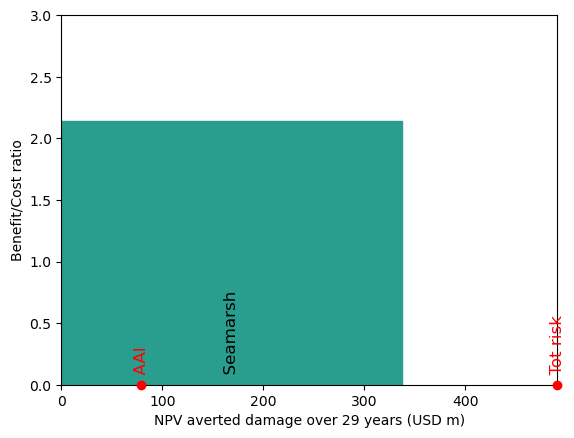

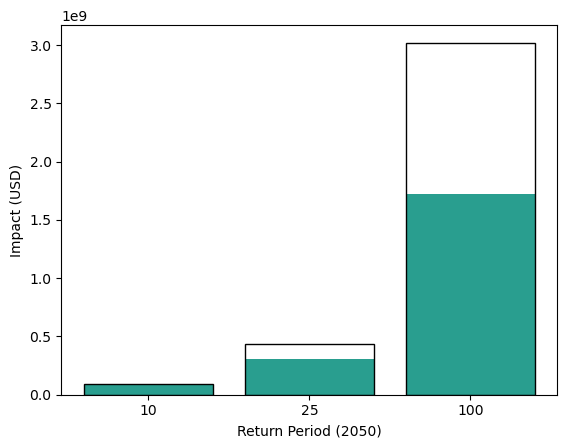

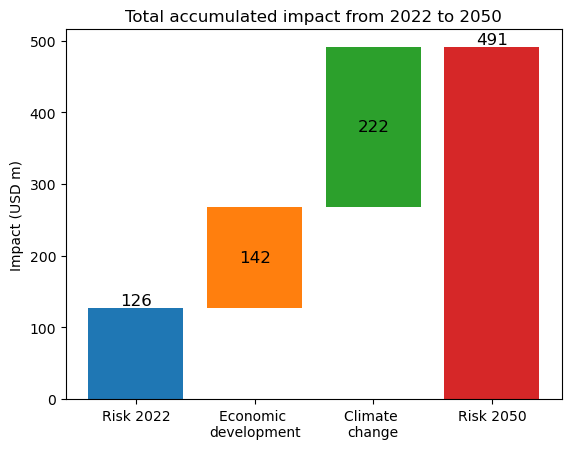

In [170]:
## Plot cost-benefit of adaptation measures

cost_ben_building_TC.plot_cost_benefit()

cost_ben_building_TC.plot_event_view()

cost_ben_building_TC.plot_waterfall_accumulated(tc_ns, ENT_building, ENT_building_future)

2023-08-07 14:08:12,535 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.
2023-08-07 14:08:12,587 - climada.engine.impact - WARNING - The use of Impact().calc() is deprecated. Use ImpactCalc().impact() instead.


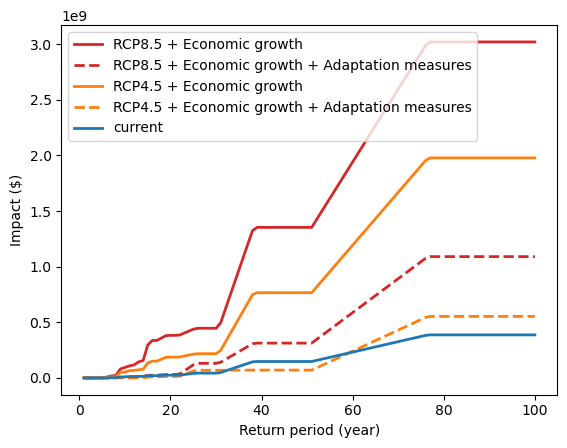

In [175]:
## Illustrate the damage reduction effect of adaptation measures under different climate scenarios (considering economic growth)

TC_meas_comb = Measure()
TC_meas_comb.name = 'Combined'
TC_meas_comb.haz_type = 'TC'
TC_meas_comb.color_rgb = np.array([1, 1, 1])
TC_meas_comb.cost = 1 # Cost is not relevant in the calculation but needed to define a measure. Therefore a random value is assigned.
TC_meas_comb.hazard_inten_imp = (1, -8) 
# NOTE: when creating a combined measure for surge adaptation, change -4 to -3.


IMP_building_TC_eg_85 = Impact() # eg stands for economic growth
IMP_building_TC_eg_85.calc(EXP_building_future, IFs_TC_building, HAZ_tc_cc85)
freq_curve_building_tc_500_eg_85 = IMP_building_TC_eg_85.calc_freq_curve(np.linspace(1, 100, 100))
tc_imp_500_eg_85 = freq_curve_building_tc_500_eg_85.impact

IMP_building_TC_eg_45 = Impact()
IMP_building_TC_eg_45.calc(EXP_building_future, IFs_TC_building, HAZ_tc_cc45)
freq_curve_building_tc_500_eg_45 = IMP_building_TC_eg_45.calc_freq_curve(np.linspace(1, 100, 100))
tc_imp_500_eg_45 = freq_curve_building_tc_500_eg_45.impact

IMP_building_TC_eg_85_meas = TC_meas_comb.calc_impact(EXP_building_future, IFs_TC_building, HAZ_tc_cc85) # meas stands for measures
freq_curve_building_tc_500_eg_85_meas = IMP_building_TC_eg_85_meas[0].calc_freq_curve(np.linspace(1, 100, 100))
tc_imp_500_eg_85_meas = freq_curve_building_tc_500_eg_85_meas.impact

IMP_building_TC_eg_45_meas = TC_meas_comb.calc_impact(EXP_building_future, IFs_TC_building, HAZ_tc_cc45)
freq_curve_building_tc_500_eg_45_meas = IMP_building_TC_eg_45_meas[0].calc_freq_curve(np.linspace(1, 100, 100))
tc_imp_500_eg_45_meas = freq_curve_building_tc_500_eg_45_meas.impact

tc_imp_500_eg_0_meas = freq_curve_building_TC.impact

rp = freq_curve_building_tc_500_eg_85.return_per

plt.plot(rp, tc_imp_500_eg_85, label='SSP8.5 + Economic growth', color='tab:red', linewidth=2.0)
plt.plot(rp, tc_imp_500_eg_85_meas, label='SSP8.5 + Economic growth + Adaptation measures', color='tab:red', linewidth=2.0, linestyle='--')
plt.plot(rp, tc_imp_500_eg_45, label='SSP4.5 + Economic growth', color='tab:orange', linewidth=2.0)
plt.plot(rp, tc_imp_500_eg_45_meas, label='SSP4.5 + Economic growth + Adaptation measures', color='tab:orange', linewidth=2.0, linestyle='--')
plt.plot(rp, tc_imp_500_eg_0_meas, label='current', color='tab:blue', linewidth=2.0)

plt.legend()
# plt.yscale('log')
plt.xlabel('Return period (year)')
plt.ylabel('Impact ($)')
plt.title('')
fig = plt.gcf()

In [171]:
## Model Evaluation
# Uncertainty and Sensitivity Analysis

import warnings
warnings.filterwarnings('ignore') #Ignore warnings

#Define the base exposure
from climada.util.constants import EXP_DEMO_H5
from climada.entity import Exposures
exp_base = exp_building

In [172]:
# Define the function that returns an exposure with scaled total assed value
# Here x_exp is the input uncertainty parameter and exp_func the inputvar.func.
def exp_func(x_exp, exp_base=exp_base):
    exp = exp_base.copy()
    exp.gdf.value *= x_exp
    return exp

In [173]:
# Define the Uncertainty Variable with +-10% total asset value
# The probability density distribution of the input uncertainty parameter x_exp is sp.stats.uniform(0.9, 0.2)
from climada.engine.unsequa import InputVar
import scipy as sp

exp_distr = {"x_exp": sp.stats.uniform(0.9, 0.2),
              }
exp_iv = InputVar(exp_func, exp_distr)

In [174]:
# Uncertainty parameters
exp_iv.labels

['x_exp']

In [175]:
# Evaluate for a given value of the uncertainty parameters
exp095 = exp_iv.func(x_exp = 0.95)
print(f"Base value is {exp_base.gdf['value'].sum()}, and the value for x_exp=0.95 is {exp095.gdf['value'].sum()}")

Base value is 5183533166.697364, and the value for x_exp=0.95 is 4924356508.362495


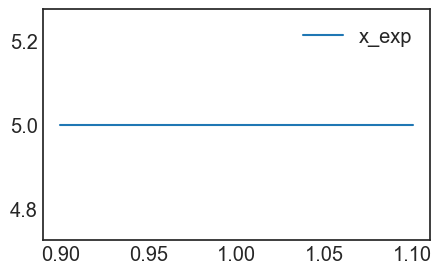

In [178]:
# Defined distribution
exp_iv.plot(figsize=(5, 3));

In [27]:
#Define the input variable functions
import numpy as np

from climada.entity import ImpactFunc, ImpactFuncSet, Exposures
from climada.util.constants import EXP_DEMO_H5, HAZ_DEMO_H5
from climada.hazard import Hazard

def impf_func(G=1, v_half=84.7, vmin=25.7, k=3, _id=1):

    def xhi(v, v_half, vmin):
        return max([(v - vmin), 0]) / (v_half - vmin)

    def sigmoid_func(v, G, v_half, vmin, k):
        return G * xhi(v, v_half, vmin)**k / (1 + xhi(v, v_half, vmin)**k)

    #In-function imports needed only for parallel computing on Windows
    import numpy as np
    from climada.entity import ImpactFunc, ImpactFuncSet
    intensity_unit = 'm/s'
    intensity = np.linspace(0, 150, num=100)
    mdd = np.repeat(1, len(intensity))
    paa = np.array([sigmoid_func(v, G, v_half, vmin, k) for v in intensity])
    imp_fun = ImpactFunc("TC", _id, intensity, mdd, paa, intensity_unit)
    imp_fun.check()
    impf_set = ImpactFuncSet([imp_fun])
    return impf_set

haz = tc_ns
exp_base = exp_building
#It is a good idea to assign the centroids to the base exposures in order to avoid repeating this
# potentially costly operation for each sample.
exp_base.assign_centroids(haz)
def exp_base_func(x_exp, exp_base):
    exp = exp_base.copy()
    exp.gdf.value *= x_exp
    return exp
from functools import partial
exp_func = partial(exp_base_func, exp_base=exp_base)

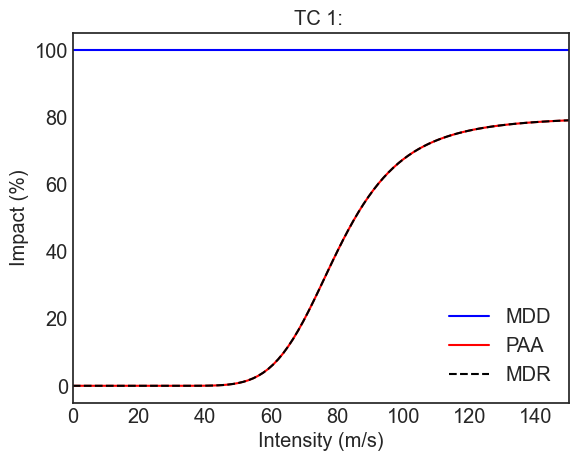

In [195]:
# Visualization of the parametrized impact function
impf_func(G=0.8, v_half=80, vmin=30,k=5).plot();

In [28]:
#Define the InputVars

import scipy as sp
from climada.engine.unsequa import InputVar

exp_distr = {"x_exp": sp.stats.beta(10, 1.1)} 

exp_iv = InputVar(exp_func, exp_distr)

impf_distr = {
    "G": sp.stats.truncnorm(0.5, 1.5),
    "v_half": sp.stats.uniform(35, 65),
    "vmin": sp.stats.uniform(0, 15),
    "k": sp.stats.uniform(1, 4)
    }
impf_iv = InputVar(impf_func, impf_distr)

In [29]:
from climada.engine.unsequa import CalcImpact

calc_imp = CalcImpact(exp_iv, impf_iv, haz)

In [198]:
output_imp = calc_imp.make_sample(N=2**7, sampling_kwargs={'skip_values': 2**8})
output_imp.get_samples_df().tail()

x_exp         G     v_half       vmin         k
1531  0.876684  1.242977  53.662109   2.080078  4.539062
1532  0.876684  0.790617  44.013672   2.080078  4.539062
1533  0.876684  0.790617  53.662109  13.681641  4.539062
1534  0.876684  0.790617  53.662109   2.080078  3.960938
1535  0.876684  0.790617  53.662109   2.080078  4.539062

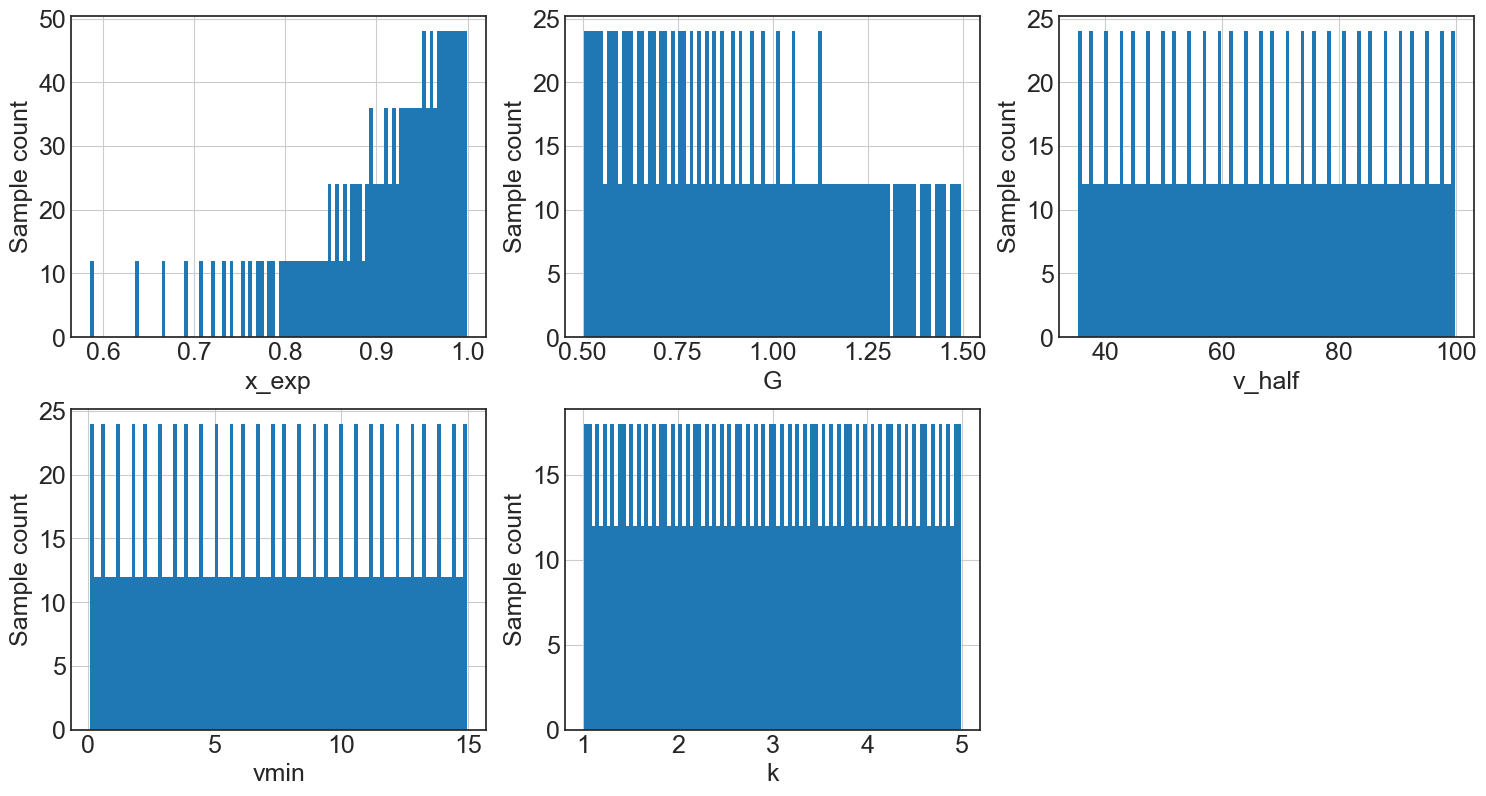

In [199]:
output_imp.plot_sample(figsize=(15,8));

In [200]:
output_imp = calc_imp.uncertainty(output_imp, rp = [50, 100, 250])

In [201]:
output_imp.get_uncertainty().tail()

aai_agg          rp50         rp100         rp250     tot_value
1531  4.197532e+07  6.470614e+08  1.073786e+09  1.073786e+09  4.544320e+09
1532  5.607142e+07  8.606811e+08  1.242454e+09  1.242454e+09  4.544320e+09
1533  1.345179e+07  2.221423e+08  5.175267e+08  5.175267e+08  4.544320e+09
1534  3.417537e+07  5.010625e+08  7.560953e+08  7.560953e+08  4.544320e+09
1535  2.669914e+07  4.115747e+08  6.830004e+08  6.830004e+08  4.544320e+09

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


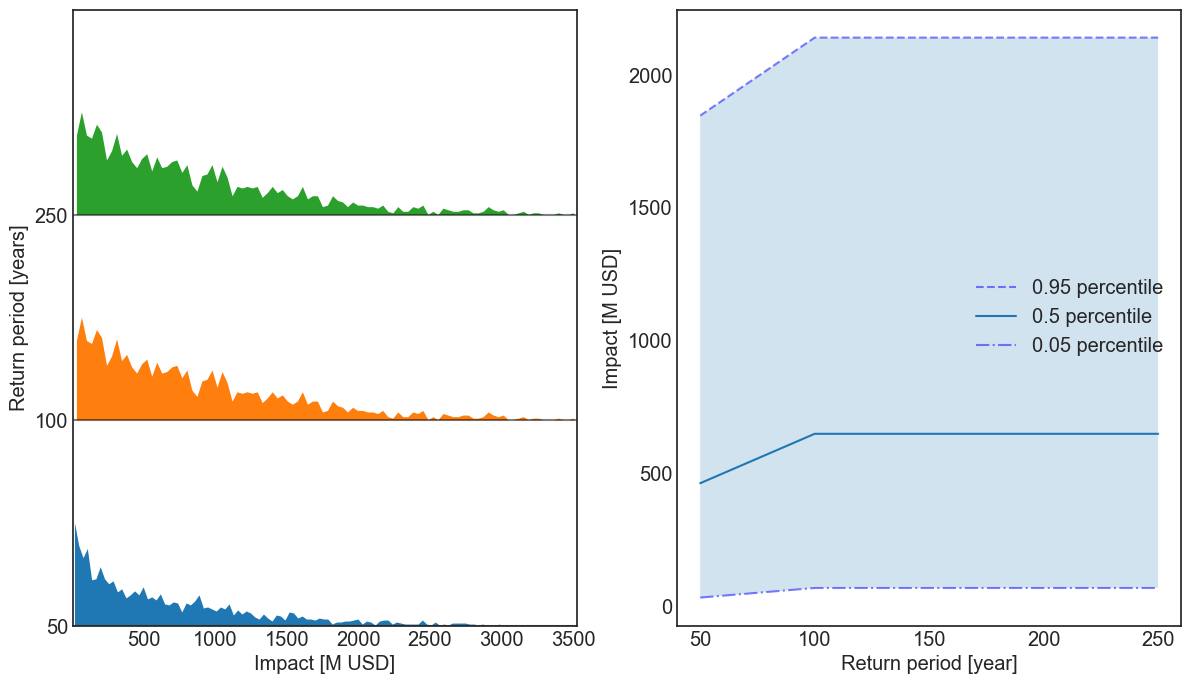

In [202]:
# Specific plot for the return period distributions
output_imp.plot_rp_uncertainty(figsize=(14.3,8));

In [203]:
output_imp = calc_imp.sensitivity(output_imp)

In [204]:
output_imp.sensitivity_metrics

['aai_agg', 'freq_curve', 'tot_value']

In [205]:
output_imp.get_sens_df('aai_agg').tail()

si param  param2  aai_agg
65  S2_conf     k   x_exp      NaN
66  S2_conf     k       G      NaN
67  S2_conf     k  v_half      NaN
68  S2_conf     k    vmin      NaN
69  S2_conf     k       k      NaN

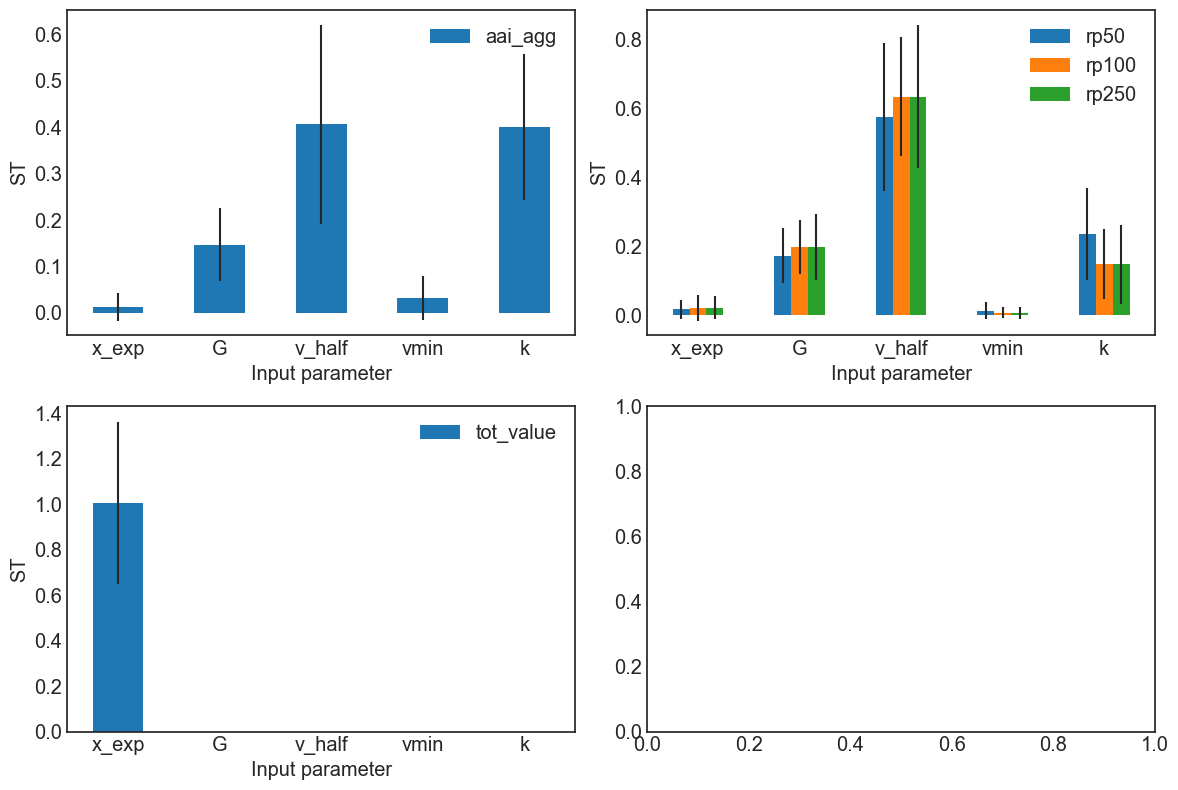

In [206]:
output_imp.plot_sensitivity(salib_si = 'ST', figsize=(12,8));

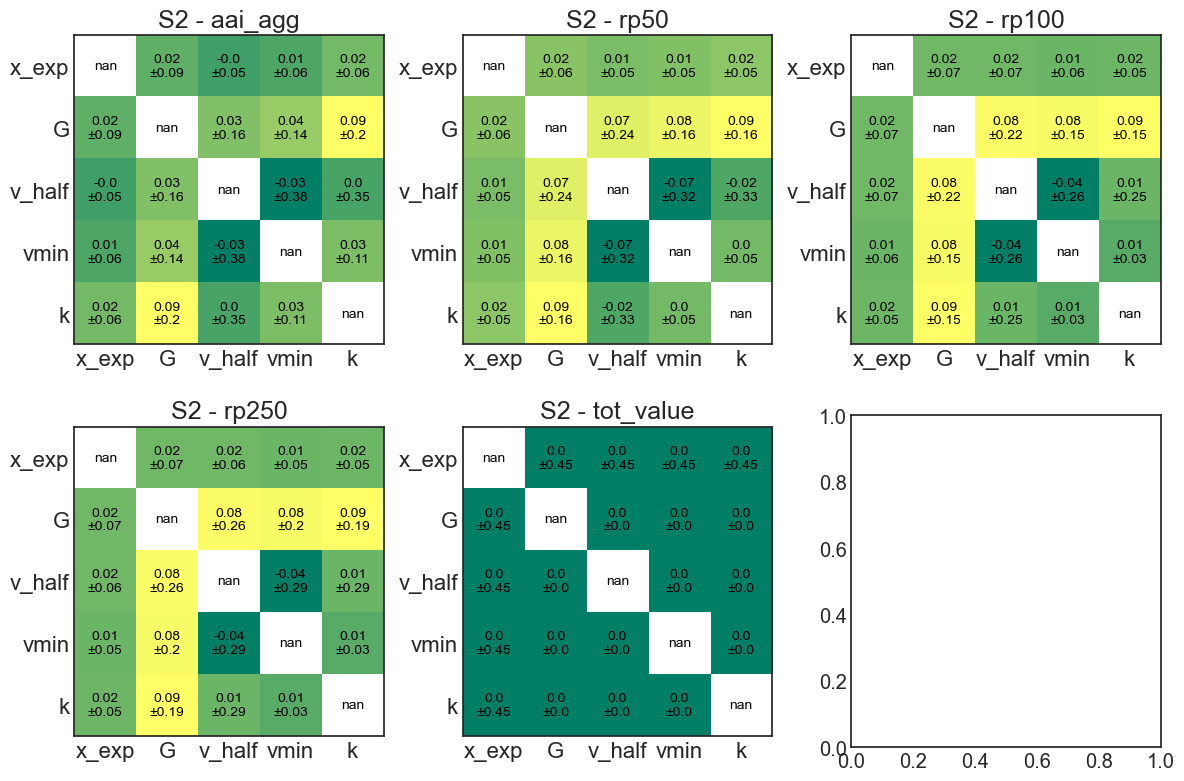

In [207]:
output_imp.plot_sensitivity_second_order(figsize=(12,8));

In [30]:
# Sampling method "latin" hypercube instead of `saltelli`.
from climada.engine.unsequa import CalcImpact

calc_imp2 = CalcImpact(exp_iv, impf_iv, haz)
output_imp2 = calc_imp2.make_sample(N=1000, sampling_method='latin')

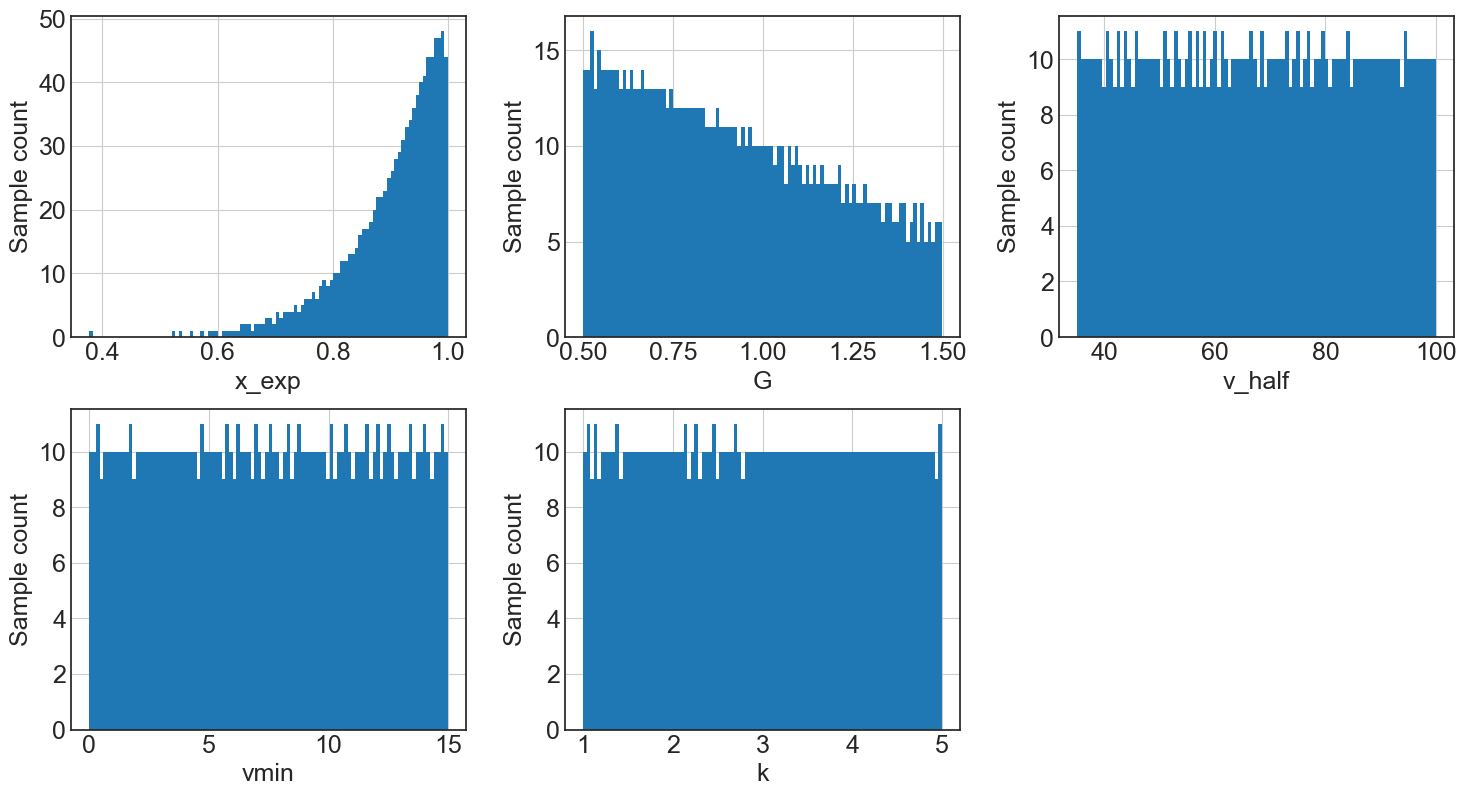

In [31]:
output_imp2.plot_sample(figsize=(15,8));

In [ ]:
# Compute also the distribution of the metric `eai_exp`
# To speed-up the comutations, we use a ProcessPool for parallel computations
from pathos.pools import ProcessPool as Pool
import time

calc_imp2 = CalcImpact(exp_iv, impf_iv, haz)
output_imp2 = calc_imp2.make_sample(N=1000, sampling_method='latin')

start = time.time()
pool = Pool()
output_imp2 = calc_imp2.uncertainty(output_imp2, rp = [50, 100, 250], calc_eai_exp=True, calc_at_event=True, pool=pool)
pool.close() #Do not forget to close your pool!
pool.join()
pool.clear()
end = time.time()
time_passed = end-start
print(f'Time passed with pool: {time_passed}')

In [475]:
# importing datetime class
from datetime import datetime
 
# Creating an instance of datetime.
dateIs = datetime(2099, 1, 1)
 
# Using toordinal() method
toOrdinal = dateIs.toordinal()
print(f"Ordinal value of Earliest Datetime {dateIs} is {toOrdinal}")

Ordinal value of Earliest Datetime 2099-01-01 00:00:00 is 766280
